In [33]:
from sklearn.model_selection import cross_val_score


In [32]:
import sys
import csv
import datetime
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from datetime import datetime
#import gender_guess.detector as gender
#from sklearn.preprocessing import Imputer
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from  sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline 

In [13]:
    genuine_users = pd.read_csv("users (3).csv")
    fake_users = pd.read_csv("fusers (3).csv")
    # print genuine_users.columns
    # print genuine_users.describe()
    #print fake_users.describe()
    x=pd.concat([genuine_users,fake_users])   
    y=len(fake_users)*[0] + len(genuine_users)*[1]

In [14]:
x

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
0,3610511,Davide Dellacasa,braddd,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,http://braddd.tumblr.com,...,FFF7CC,http://a0.twimg.com/profile_background_images/...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2015-02-14 10:54:49,E13
1,5656162,Simone Economo,eKoeS,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,http://www.lineheight.net/,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2015-02-14 10:54:49,E13
2,5682702,tacone,tacone_,4024,264,87,323,16,Tue May 01 11:53:40 +0000 2007,http://t.co/LKrl1dZE,...,000000,http://a0.twimg.com/profile_background_images/...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,2015-02-14 10:54:49,E13
3,6067292,alesaura,alesstar,40586,640,622,1118,32,Tue May 15 16:55:16 +0000 2007,http://alesstar.wordpress.com/,...,95E8EC,http://a0.twimg.com/images/themes/theme4/bg.gif,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",2015-02-14 10:54:49,E13
4,6015122,Angelo,PerDiletto,2016,62,64,13,0,Sun May 13 19:52:00 +0000 2007,http://www.flickr.com/per_diletto,...,F6F6F6,http://a0.twimg.com/images/themes/theme18/bg.gif,ACDED6,038543,3600.0,NaN,NaN,Je me souviens,2015-02-14 10:54:49,E13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1391497074,Verda Marks,VerdaMarks1,1,0,17,0,0,Tue Apr 30 08:23:57 +0000 2013,NaN,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,NaN,NaN,NaN,I have been in business onlin and offline for ...,2015-02-14 10:40:01,INT
1333,1391544607,Danial Campbell,DanialCampbell2,0,1,17,0,0,Tue Apr 30 08:34:49 +0000 2013,NaN,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,NaN,NaN,NaN,NaN,2015-02-14 10:40:01,INT
1334,1391622127,Maudie Meyer,MaudieMeyer1,2,0,15,0,0,Tue Apr 30 09:21:12 +0000 2013,NaN,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,NaN,NaN,NaN,NaN,2015-02-14 10:40:01,INT
1335,1391832212,Harriett Harvey,HarriettHarvey9,2,0,16,0,0,Tue Apr 30 11:25:11 +0000 2013,NaN,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,NaN,NaN,NaN,NaN,2015-02-14 10:40:01,INT


In [18]:
lang_list = list(enumerate(np.unique(x['lang'])))   
lang_dict = { name : i for i, name in lang_list }             
x.loc[:,'lang_code'] = x['lang'].map( lambda x: lang_dict[x]).astype(int)  
feature_columns_to_use = ['statuses_count','followers_count','friends_count','favourites_count','listed_count','lang_code']
x=x.loc[:,feature_columns_to_use]

In [19]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [20]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['Fake','Genuine']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
def plot_roc_curve(y_test, y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

    print ("False Positive rate: ",false_positive_rate)
    print ("True Positive rate: ",true_positive_rate)


    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show() 

In [46]:
def train(X_train,y_train,X_test):
    """ Trains and predicts dataset with a Random Forest classifier """
    
    clf=RandomForestClassifier(n_estimators=39,oob_score=True)
    clf.fit(X_train,y_train)
    print("The best classifier is: ",clf)
    # Estimate score
    scores = model_selection.cross_val_score(clf, X_train,y_train, cv=5)
    print (scores)
    print('Estimated score: %0.5f (+/- %0.5f)' % (scores.mean(), scores.std() / 2))
    title = 'Learning Curves (Random Forest)'
    plot_learning_curve(clf, title, X_train, y_train, cv=5)
    plt.show()
    # Predict 
    y_pred = clf.predict(X_test)
    return y_test,y_pred

In [47]:
x.columns

Index(['statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'lang_code'],
      dtype='object')

In [48]:
x.describe()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang_code
count,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000
mean,1672.198368,371.105039,395.363023,234.541164,2.818666,2.851313
std,4884.669157,8022.631339,465.694322,1445.847248,23.480430,1.992950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,17.000000,168.000000,0.000000,0.000000,1.000000
50%,77.000000,26.000000,306.000000,0.000000,0.000000,1.000000
75%,1087.750000,111.000000,519.000000,37.000000,1.000000,5.000000
max,79876.000000,408372.000000,12773.000000,44349.000000,744.000000,7.000000


In [49]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=44)

The best classifier is:  RandomForestClassifier(n_estimators=39, oob_score=True)
[0.93126386 0.93348115 0.94678492 0.9578714  0.94444444]
Estimated score: 0.94277 (+/- 0.00483)


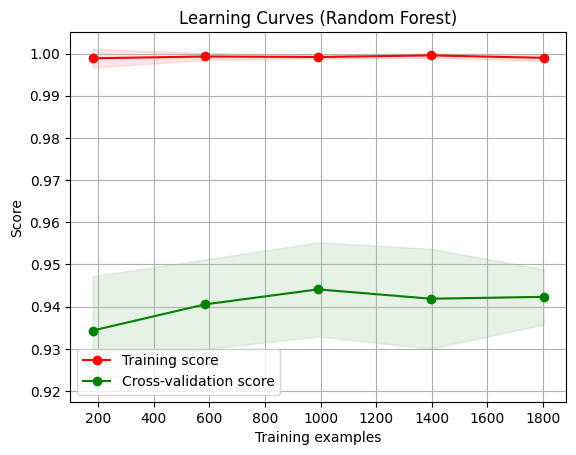

In [50]:
y_test,y_pred = train(X_train,y_train,X_test)

In [51]:
accuracy_score(y_test, y_pred)

0.9450354609929078

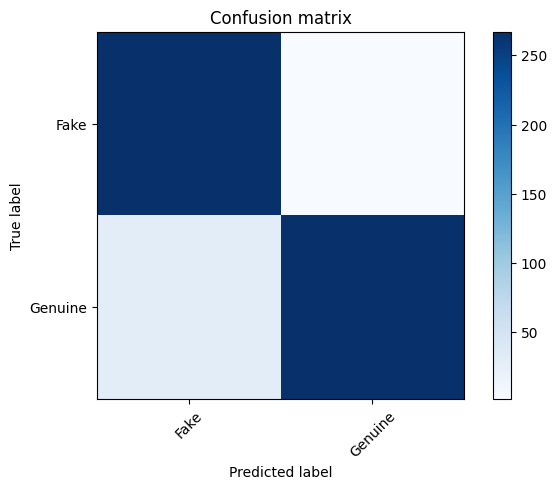

In [52]:
cm=confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

In [40]:
print(classification_report(y_test, y_pred, target_names=['Fake','Genuine']))

              precision    recall  f1-score   support

        Fake       0.90      0.99      0.94       268
     Genuine       0.99      0.90      0.94       296

    accuracy                           0.94       564
   macro avg       0.95      0.95      0.94       564
weighted avg       0.95      0.94      0.94       564



False Positive rate:  [0.         0.00746269 1.        ]
True Positive rate:  [0.         0.89864865 1.        ]


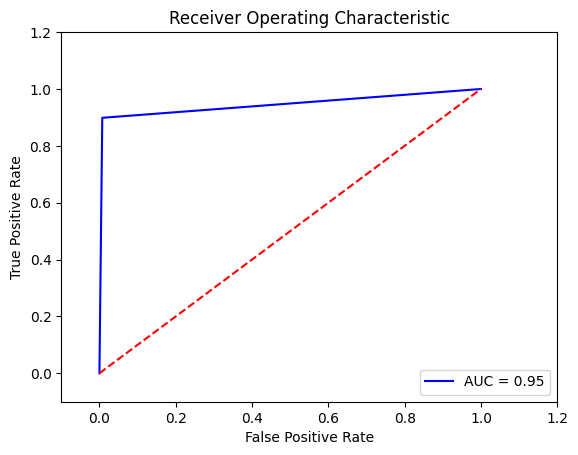

In [42]:
 plot_roc_curve(y_test, y_pred)

In [43]:
import pandas_profiling as pp  
from pandas_profiling import ProfileReport

C:\Users\sunil\AppData\Local\Temp\ipykernel_6604\905993008.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [44]:
profile =ProfileReport(x,title="Pandas Profiling Report")

In [45]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]